In [1]:
#Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler

In [4]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
 
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

In [5]:
df = pd.read_csv('../Data/Kaggle Dataset/spam_email.csv')

In [6]:
'''
label
    '1' indicates that the email is classified as spam.
    '0' denotes that the email is legitimate (ham).
text
    This column contains the actual content of the email messages.
'''
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


<Axes: xlabel='label', ylabel='count'>

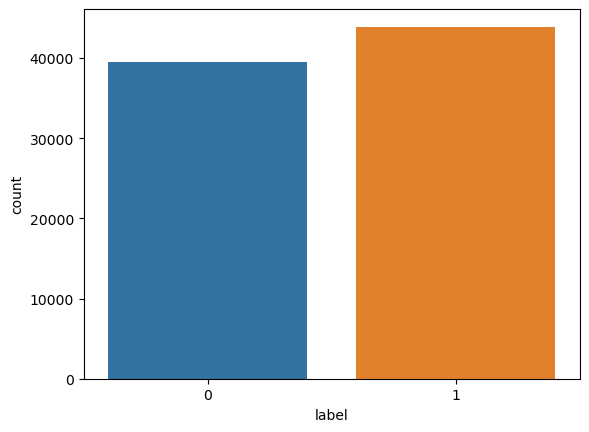

In [8]:
sns.countplot(x = df['label'])

In [9]:
df['length'] = df['text'].apply(lambda x:len(x.split(' ')))

In [10]:
df.head()

,label,text,length
0,1,ounce feather bowl hummingbird opec moment ala...,20
1,1,wulvob get your medircations online qnb ikud v...,103
2,0,computer connection from cnn com wednesday es...,339
3,1,university degree obtain a prosperous future m...,77
4,0,thanks for all your answers guys i know i shou...,223


In [7]:
y = df['label']
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
# Data Preprocessing - Lemmatization and Stop words removal.
def text_cleaning(txt):    
    txt = txt.lower()
    txt = re.sub(r'[^a-zA-Z\s]', '', txt) 
    words = [word for word in txt.split(' ') if word not in stopwords.words("english")]
    txt = ' '.join(wnl.lemmatize(word) for word in words)
    return txt

In [13]:
df['processed'] = df['text'].apply(lambda x: text_cleaning(x))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['processed'], y, test_size=0.2, random_state=101)

# Word2Vec
 Now can apply couple of methods. Let's start with word2Vec

In [15]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

def train_word2Vec_model(X_train):
    sentences = list(X_train)

    # Tokenize the sentences
    tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=500, window=5, min_count=1, workers=4)
    return model


In [16]:
# Function to get sentence embeddings
def get_sentence_vector(sentence, model):
    words = word_tokenize(sentence.lower())
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Average word vectors
    else:
        return np.zeros(model.vector_size)  # Zero vector for empty sentences

In [17]:
model = train_word2Vec_model(X_train)
X_train = X_train.apply(lambda x:get_sentence_vector(x, model))
X_test = X_test.apply(lambda x:get_sentence_vector(x, model))

# TFiDF Vectorizer 

In [ ]:
tfIdf = TfidfVectorizer()
X_train = tfIdf.fit_transform(X_train)
X_test = tfIdf.transform(X_test)

# Bag of Words i.e Count Vectorizer 

In [ ]:

countVec = CountVectorizer()
X_train = countVec.fit_transform(X_train)
X_test = countVec.transform(X_test)

In [18]:
# Let us apply now different classification algorithms
# Now let u perform all the ML techniques

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from datetime import datetime

In [21]:
models = {'Logistic Regression':LogisticRegression(), 
         'Support Vector Classifier':SVC(),'Decision Tree':DecisionTreeClassifier(),
         'Random Forest':RandomForestClassifier(),'Neural Network':MLPClassifier(),
         'Stochastic Gradient Descent':SGDClassifier(), 'XGBClassifier':XGBClassifier(),
          'ExtraTreesClassifier':ExtraTreesClassifier(), 'AdaBoostClassifier':AdaBoostClassifier(),
          'GradientBoostingClassifier':GradientBoostingClassifier(),
          'KNN':KNeighborsClassifier()}

# While using word2Vec, please use the list() casting of X_train and X_test
for model, algorithm in models.items():
    start_time = datetime.now()    
#     pipe = Pipeline([('model', algorithm)])    
#     pipe.fit(X_train ,y_train)
#     end_time = datetime.now() 
#     prediction = pipe.predict(X_test)

    pipe = Pipeline([('model', algorithm)])    
    pipe.fit(list(X_train) ,y_train)
    end_time = datetime.now() 
    prediction = pipe.predict(list(X_test))

    print("\n \n ======= For {} ============".format(model))
    print('Accuracy Score : {} '.format(accuracy_score(prediction,y_test)))
    print('Confusion Matrix \n\n  ',confusion_matrix(prediction,y_test))
    print('\n Classification Report \n ')
    print(classification_report(prediction,y_test))
    time_difference = (end_time - start_time).total_seconds() * 10**3
    print("Execution time of program is: ", time_difference, "ms")

C:\Users\ArnabBiswas\anaconda3\envs\mlenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 
 ======= For Logistic Regression ============
Accuracy Score : 0.970461354104254 
Confusion Matrix 

   [[7642  252]
 [ 241 8555]]

 Classification Report 
 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7894
           1       0.97      0.97      0.97      8796

    accuracy                           0.97     16690
   macro avg       0.97      0.97      0.97     16690
weighted avg       0.97      0.97      0.97     16690

Execution time of program is:  4695.0599999999995 ms

 
 ======= For Support Vector Classifier ============
Accuracy Score : 0.9838226482923906 
Confusion Matrix 

   [[7712   99]
 [ 171 8708]]

 Classification Report 
 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7811
           1       0.99      0.98      0.98      8879

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       

C:\Users\ArnabBiswas\anaconda3\envs\mlenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



 
 ======= For AdaBoostClassifier ============
Accuracy Score : 0.9576992210904733 
Confusion Matrix 

   [[7550  373]
 [ 333 8434]]

 Classification Report 
 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7923
           1       0.96      0.96      0.96      8767

    accuracy                           0.96     16690
   macro avg       0.96      0.96      0.96     16690
weighted avg       0.96      0.96      0.96     16690

Execution time of program is:  357411.455 ms

 
 ======= For GradientBoostingClassifier ============
Accuracy Score : 0.9715398442180947 
Confusion Matrix 

   [[7614  206]
 [ 269 8601]]

 Classification Report 
 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7820
           1       0.98      0.97      0.97      8870

    accuracy                           0.97     16690
   macro avg       0.97      0.97      0.97     16690
weighted avg       0.97   

# Tensorflow and LSTM
Now let us try some deep learning

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['processed'])
sequences = tokenizer.texts_to_sequences(df['processed'])

# Step 2: Pad the sequences (ensure same length for each document)
max_length = 100  # You can choose a length depending on your dataset
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

print(padded_sequences)

[[9022 9195 8134 ...    0    0    0]
 [   1   24    1 ...    0    0    0]
 [ 394  989  129 ...   46 5113  900]
 ...
 [ 255 1555  313 ...    0    0    0]
 [1779  120  797 ...   86  639    2]
 [  24  231  520 ...    0    0    0]]


In [23]:
model = tf.keras.Sequential([
    # Embedding layer converts tokens into dense vectors (embedding dimension is 16)
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=max_length),
    
    # LSTM layer to process the sequences
    tf.keras.layers.LSTM(64, return_sequences=False),  # 64 units in the LSTM
    
    # Output layer: binary classification (1 or 0)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 180801 (706.25 KB)
Trainable params: 180801 (706.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [25]:
# Train the model

X, X_test, Y, y_test = train_test_split(padded_sequences, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X,Y,test_size=0.2)

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
1669/1669 [==============================] - 84s 48ms/step - loss: 0.4263 - accuracy: 0.8119 - val_loss: 0.2051 - val_accuracy: 0.9470
Epoch 2/50
1669/1669 [==============================] - 84s 50ms/step - loss: 0.2573 - accuracy: 0.8906 - val_loss: 0.1045 - val_accuracy: 0.9687
Epoch 3/50
1669/1669 [==============================] - 83s 50ms/step - loss: 0.0996 - accuracy: 0.9703 - val_loss: 0.1198 - val_accuracy: 0.9724
Epoch 4/50
1669/1669 [==============================] - 84s 50ms/step - loss: 0.0604 - accuracy: 0.9833 - val_loss: 0.0750 - val_accuracy: 0.9812
Epoch 5/50
1669/1669 [==============================] - 86s 51ms/step - loss: 0.0550 - accuracy: 0.9859 - val_loss: 0.0651 - val_accuracy: 0.9814
Epoch 6/50
1669/1669 [==============================] - 89s 53ms/step - loss: 0.0436 - accuracy: 0.9899 - val_loss: 0.0619 - val_accuracy: 0.9800
Epoch 7/50
1669/1669 [==============================] - 88s 53ms/step - loss: 0.0346 - accuracy: 0.9920 - val_loss: 0.0687 -

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

522/522 [==============================] - 9s 17ms/step - loss: 0.1392 - accuracy: 0.9810
Test Loss: 0.13919325172901154, Test Accuracy: 0.9810065627098083


In [27]:
# Save the model
model.save('text_classification_lstm_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('text_classification_lstm_model.h5')

C:\Users\ArnabBiswas\anaconda3\envs\mlenv\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
